In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

### Review of lecture 20


In Lecture 20 we:

- learned how to plot different map projections

- learned about some properties of a Basemap object

### In this lecture we will:

- Learn about gridding and contouring.





### Gridding

Remember this figure?   


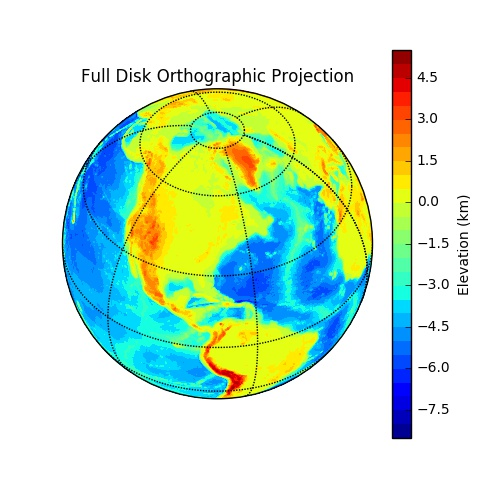

In [10]:
Image(filename='Figures/etopo20.jpg',width=500)

We now have the tools to make it!

First, you should recognize the basic orthographic projection from last lecture.

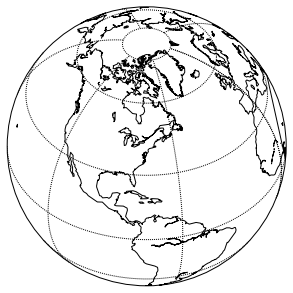

In [11]:
# lon_0, lat_0 are the center point of the projection.
plt.figure(1,(5,5)) # make the figure instance with a size of 5x5
m = Basemap(projection='ortho',lon_0=-75,lat_0=42) # make an orthographic projection map object
m.drawcoastlines() # put on the coastlines
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.));


And remember the topography data in the Etopo20 files from the lecture on the hypsographic curve (Lecture 15):

In [12]:
etopo=np.loadtxt('Datasets/Etopo/etopo20data.gz')
elons=np.loadtxt('Datasets/Etopo/etopo20lons.gz')
elats=np.loadtxt('Datasets/Etopo/etopo20lats.gz')
print (etopo.shape)
print (elons.shape)
print (elats.shape)



(540, 1081)
(1081,)
(540,)


**elats** is a 1D array with 540 latitudinal bins (this is a long and skinny array- 540 x 1). 

**elons** is a 1D array with 1081 longitudinal bins (this as a fat and wide array- 1 x 1081).  
And **etopo** is a 2D array with 540 rows and 1081 columns (540 x 1080).  

So **etopo** has an elevation for each lat/lon cell.  

In order to plot the elevation data onto a lat/lon grid, we have to first make a grid out of the 1D arrays of elats/ and elons.  

We use the **pylab** function **meshgrid** for this.  


In [13]:
from pylab import meshgrid
help (meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

Let's try out meshgrid on some smaller arrays first, to wrap our mind around it, so to speak. 

In [14]:
x = np.arange(-3.2, 3.3, 0.1) # make a 1D array from -3.3 to 3.2 with a spacing of .1
y = np.arange(-3.2, 3.3, 0.1) # ditto
xx, yy = meshgrid(x, y) # make a meshgrid
print (x.shape)
print (y.shape)
print (xx.shape)
print (xx[0:5])

(65,)
(65,)
(65, 65)
[[ -3.20000000e+00  -3.10000000e+00  -3.00000000e+00  -2.90000000e+00
   -2.80000000e+00  -2.70000000e+00  -2.60000000e+00  -2.50000000e+00
   -2.40000000e+00  -2.30000000e+00  -2.20000000e+00  -2.10000000e+00
   -2.00000000e+00  -1.90000000e+00  -1.80000000e+00  -1.70000000e+00
   -1.60000000e+00  -1.50000000e+00  -1.40000000e+00  -1.30000000e+00
   -1.20000000e+00  -1.10000000e+00  -1.00000000e+00  -9.00000000e-01
   -8.00000000e-01  -7.00000000e-01  -6.00000000e-01  -5.00000000e-01
   -4.00000000e-01  -3.00000000e-01  -2.00000000e-01  -1.00000000e-01
    2.66453526e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
    4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
    8.00000000e-01   9.00000000e-01   1.00000000e+00   1.10000000e+00
    1.20000000e+00   1.30000000e+00   1.40000000e+00   1.50000000e+00
    1.60000000e+00   1.70000000e+00   1.80000000e+00   1.90000000e+00
    2.00000000e+00   2.10000000e+00   2.20000000e+00   2.30000000e+00

Now let's put some 'data' on this grid:

In [15]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
print (z.shape)
print (z[0:5])

(65, 65)
[[ 0.04874129  0.04240357  0.01978166 -0.01062917 -0.03848542 -0.05525412
  -0.05655279 -0.04273656 -0.01799396  0.01139893  0.03895874  0.05947836
   0.06985375  0.0692455   0.05873339  0.04068985  0.01808671 -0.0061086
  -0.02936306 -0.04981395 -0.0663341  -0.07847277 -0.08632353 -0.09036374
  -0.0912986  -0.08992935 -0.08705429 -0.08340291 -0.0795987  -0.07614349
  -0.07341601 -0.0716779  -0.07108182 -0.0716779  -0.07341601 -0.07614349
  -0.0795987  -0.08340291 -0.08705429 -0.08992935 -0.0912986  -0.09036374
  -0.08632353 -0.07847277 -0.0663341  -0.04981395 -0.02936306 -0.0061086
   0.01808671  0.04068985  0.05873339  0.0692455   0.06985375  0.05947836
   0.03895874  0.01139893 -0.01799396 -0.04273656 -0.05655279 -0.05525412
  -0.03848542 -0.01062917  0.01978166  0.04240357  0.04874129]
 [ 0.04240357  0.01883608 -0.01274966 -0.04093405 -0.05646843 -0.05497775
  -0.0375519  -0.00954929  0.0215723   0.04851553  0.06584536  0.07083765
   0.06350006  0.04599635  0.02177758 -0.0

### Contouring

One way to visualize data in a 2D grid is to make a contour plot of it.  For this we
use the **matplotlib.pyplot** function **contour**  or **contourf**.  

In [16]:
help(plt.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour 

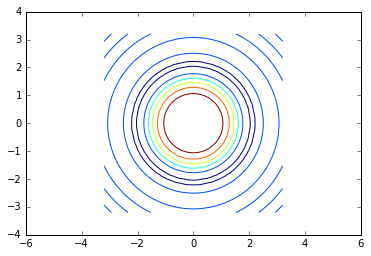

In [17]:
h = plt.contour(x,y,z,cmap=cm.jet) # plot the contours
plt.axis('equal'); 
# this makes the axes "square" so we get a circle and not a squashed ellipse


Just in case you want to label your contours, you can use the **clabel** function from **pylab**. 

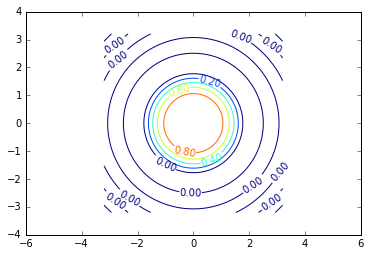

In [18]:
fig = plt.contour(x,y,z,levels=np.arange(0,1.20,.20),cmap=cm.jet)
plt.axis('equal')
plt.clabel(fig, inline=1, fontsize=10,fmt='%3.2f');

### Practice with meshgrid and contour
- make a  lambda function for the equation 
$$ c=f(a,b)=(1-a^2+b^3) e^{-(a^2+b^2)/2}$$.
- make a and b arrays that range from -3 to 3 in increments of 0.1.
- Make a meshgrid of a and b.
- Evaluate c for the meshgrid
- Make a contour plot of a,b and c.  

Contour plots are  all well and good, but what we were after was a continuous gradation of color, not the contour lines, so for that we use the function **contourf** instead: 

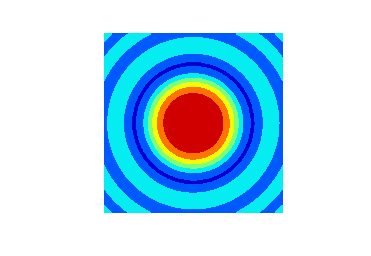

In [19]:
fig = plt.contourf(x,y,z,cmap=cm.jet)
plt.axis('equal') # this makes the axes square
plt.axis('off'); # and this turns off the frame, ticks and labels


So, where were we? Oh yes, we wanted to plot the contoured elevation data onto an orthographic projection.  We can use **meshgrid** from **Basemap** called **\*meshgrid**.
This form is a method of our  map object **m** defined above.  **m** also has a **contourf** method that works like **pylab**'s:   

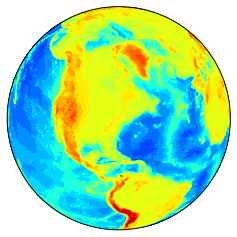

In [20]:
x,y=m(*meshgrid(elons,elats))
cs=m.contourf(x,y,etopo,30,cmap=cm.jet) # the 30 is the number of contours


Tada!!!

### Application to the Earth's magnetic field

Now we know how to grid and contour data, we can try to plot other features of our planet, like the magnetic field strength or inclination (dip below or above the horizontal).  I prepared a module named **mkigrf** for your mapping pleasure.   It has includes a few functions that evaluate elements of the magnetic field for any date between 1900 and 2020 including total field strength, direction, and radial field strength. Up until 2015, the data come from the  International Geomagnetic Reference Field (IGRF) model and after that, the data are extrapolated.  To learn more, check out this website:  https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html.

You can use the function **mkigrf.doigrf** to find out the magnetic declination at a particular time and place. You could then use this function to set your compass.  Handy for us geology types...  

But  first, I should explain what the magnetic vector is.  As with all vectors, it has both direction and length.  We can express the vector in terms of cartesian coordinates (say, North, East and Down) or these polar coordinates:
- declination: the angle of the magnetic direction in the horizontal plane with respect to the North pole
- inclination: the angle of the magnetic direction in the vertical plane with respect to the horizontal
- intensity: the strength of the field, usually in units of tesla (either nano or micro). Tesla is is magnetic induction and is usually represented by the letter **B**.  

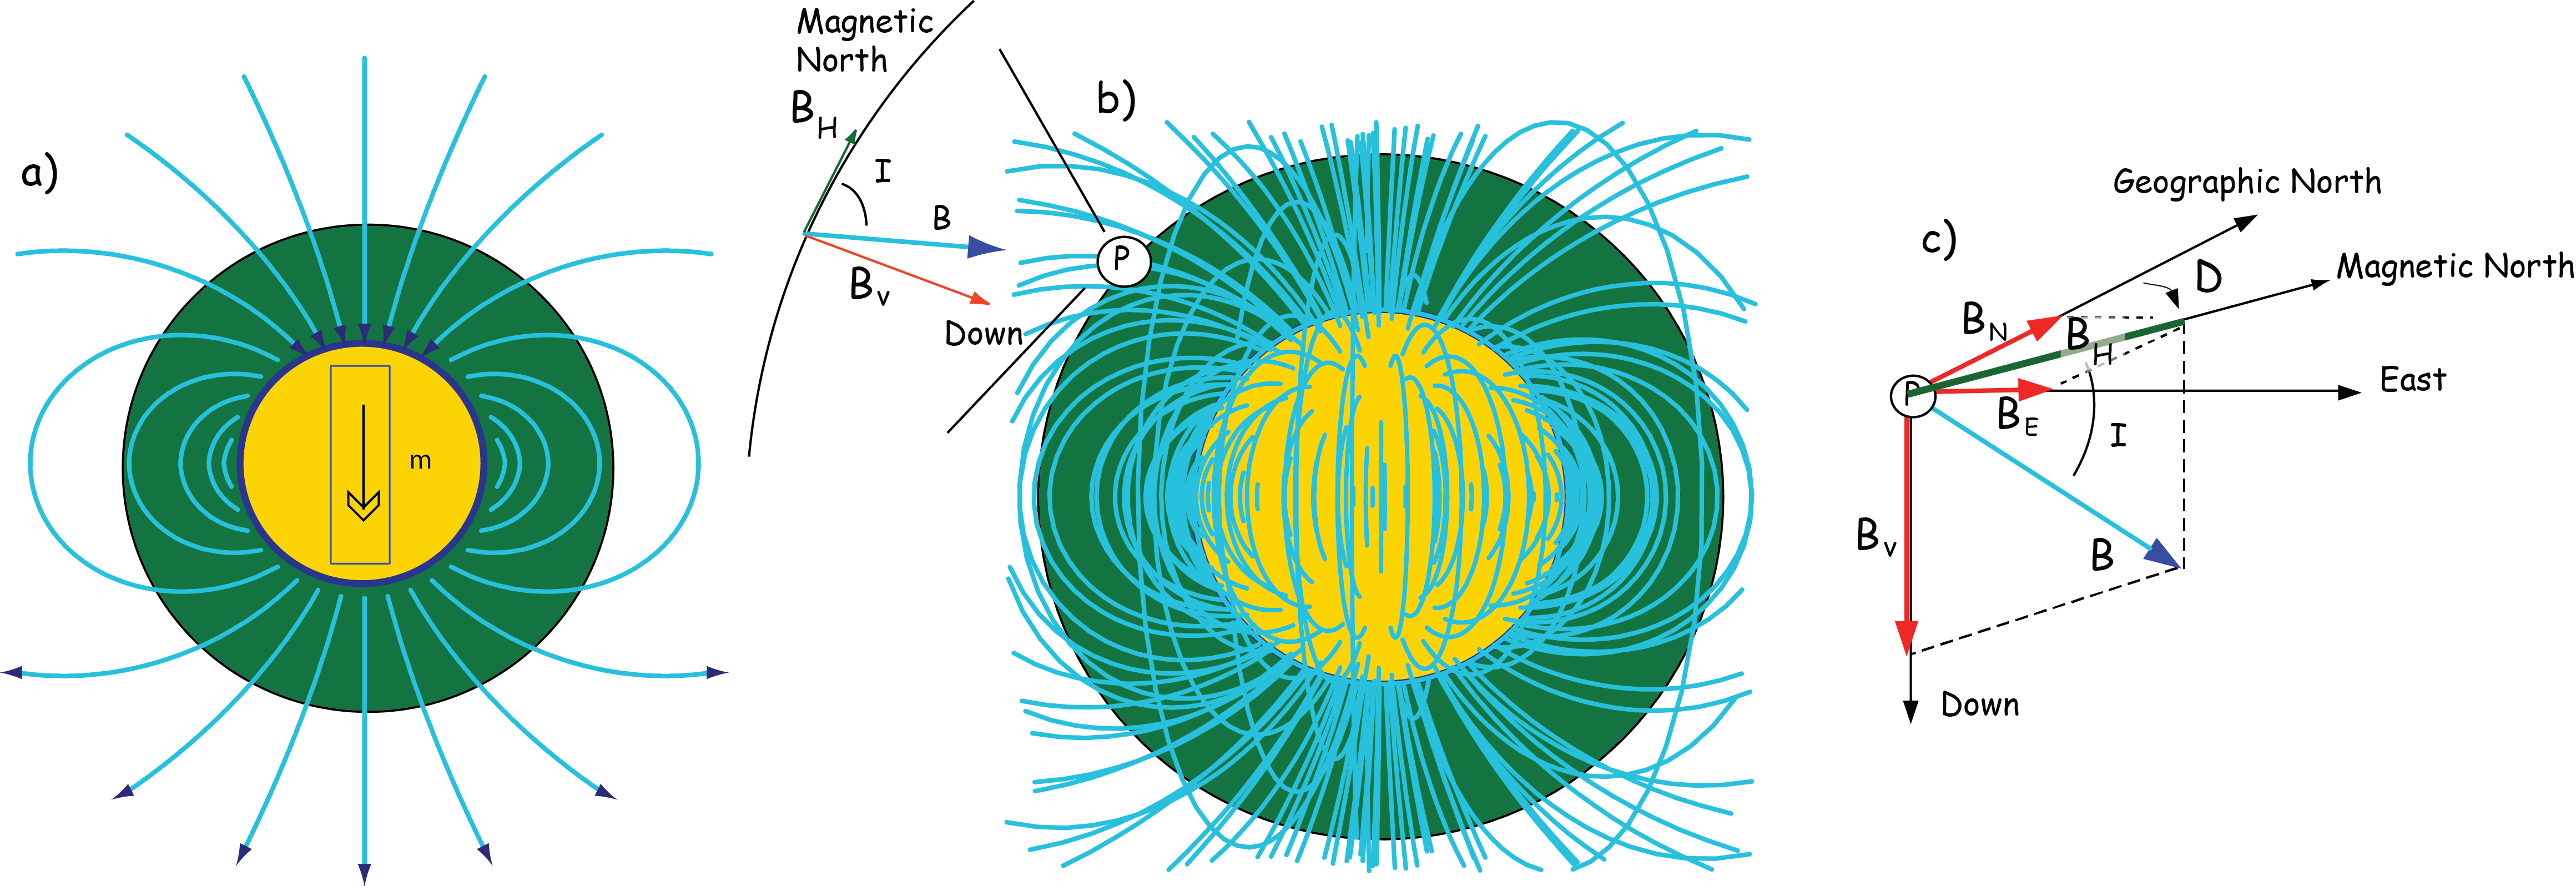

In [21]:
Image(filename='Figures/components.png')

_a) Lines of flux produced by  a geocentric axial dipole.  b) Lines of flux  of the geomagnetic field of 2005.   At point P the horizontal component of the  field_ $B_H$, _is directed toward the magnetic north.  The vertical component_ $B_V$ _is directed down and the field makes an angle_ $I$ _with the horizontal, known as the
inclination.  c) Components of the geomagnetic field vector_ ${\bf B}$.  _The angle between the horizontal component (directed toward magnetic north and geographic north is the 
declination_ $D$._) [Modified from Ben-Yosef et al., 2008, doi:10.1016/j.jas.2008.05.016] _

In [22]:
import mkigrf
help(mkigrf.doigrf)

Help on function doigrf in module mkigrf:

doigrf(long, lat, date)
    Returns the x,y,z,f components of the geomagnetic field at location long/lat for decimal year.
    x,y,z are the cartesian components of the field and f is the total field strength (in nT).



**mkigrf.doigrf** returns $x,y,z$ cartesian components of the magnetic field vector.  But we wan to plot the polar coordinates _declination, inclination, and strength_.  So we need to convert from cartesian coordinates to polar coordinates.  There is a handy function  **mkigrf.cart2dir()** that will do this for you.   For example, we find the declination for San Diego in 2017 like this:

In [23]:
San_lat=33
San_lon=243
x,y,z,f=mkigrf.doigrf(San_lon,San_lat,2018)
Dec,Inc,B=mkigrf.cart2dir(x,y,z)
print ('%7.1f'%(Dec)) # notice the formatting

   11.5


### Practice with mkigrf
- I moved to San Diego in 1983.  What was the field like then?  
- Make a plot of declination in San Diego over the last 100 years. 

We can use the tools in **mkigrf** to evaluate the magnetic field over the surface of the Earth and then contour it on, say, a Hammer projection.  I'm going to go ahead and make a function for this so we can change the map central longitude and date as we like. 

In [24]:
def magMap(date,**kwargs):
    """
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = arrayof latitudes

    """
    if 'lon_0' in kwargs.keys(): # check if there are keyword arguments
        lon_0=kwargs['lon_0'] # if lon_0 is set, use that one
    else: # otherwise..... 
        lon_0=0. # set the default lon_0 to 0. 
    incr=10 # we can vary to the resolution of the model
    lonmax=(lon_0+180.)%360+incr # get some parameters for our arrays of lat/lon
    lonmin=(lon_0-180.)
    latmax=90+incr
    lons=np.arange(lonmin,lonmax,incr) # make a 1D array of longitudes (like elons)
    lats=np.arange(-90,latmax,incr)# make a 1D array of longitudes (like elats)
    # set up some containers for the field elements
    B=np.zeros((len(lats),len(lons)))
    Binc=np.zeros((len(lats),len(lons)))
    Bdec=np.zeros((len(lats),len(lons)))
    Brad=np.zeros((len(lats),len(lons)))
    for j in range(len(lats)): # step through the latitudes
        for i in range(len(lons)): # and the longitudes
            x,y,z,f=mkigrf.doigrf(lons[i],lats[j],date)  # get the field elements
            Dec,Inc,Int=mkigrf.cart2dir(x,y,z) # turn them into polar coordites
            B[j][i]=Int*1e-3 # convert the string to microtesla (from nT)
            Binc[j][i]=Inc # store the inclination value
            Bdec[j][i]=Dec # store the declination value
    return Bdec,Binc,B,lons,lats # return the arrays.  



We can call magMap for any date we like.  

In [25]:
date=2018 # let's do this for 2018 (actually, this is the beginning of 2017)
lon_0=0 # we can specify the grid spacing and the intended 0 longitude for the plot
Ds,Is,Bs,lons,lats=magMap(date)


And.... drum roll ....  we can plot them on a contour map.  

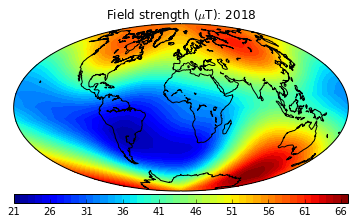

In [26]:
m = Basemap(projection='hammer',lon_0=lon_0)
x,y=m(*meshgrid(lons,lats))

m.drawcoastlines()
lincr=1
levmax=round(Bs.max())+lincr
levmin=round(Bs.min()-lincr)

cs=m.contourf(x,y,Bs,levels=np.arange(levmin,levmax,lincr),cmap=cm.jet) 
# by assigning the contourf object to cs, we can add a colorbar
cbar=m.colorbar(cs,location='bottom')
plt.title('Field strength ($\mu$T): '+str(date));



In [27]:
levmin,levmax

(21.0, 68.0)

And the same thing for the inclinations with a few more whistles and bells.

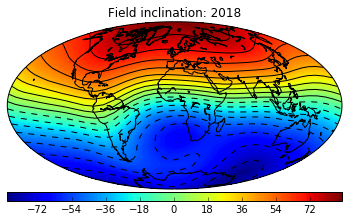

In [28]:
m = Basemap(projection='hammer',lon_0=lon_0)
x,y=m(*meshgrid(lons,lats))

m.drawcoastlines()
lincr=1
levmax=Is.max()+lincr
levmin=round(Is.min()-lincr)

cs=m.contourf(x,y,Is,levels=np.arange(levmin,levmax,lincr),cmap=cm.jet)
# put on contour lines at 10 degree intervals with  black lines
m.contour(x,y,Is,levels=np.arange(-80,90,10),colors='black') 
# by assigning the contourf object to cs, we can add a colorbar
cbar=m.colorbar(cs,location='bottom')
plt.title('Field inclination: '+str(date));



Okay - i love magnetic fields and I think these maps are cool. 

### Assignment #7

In 1600, William Gilbert explained the source of Earth's **magnetic field** by hypothesizing that the Earth itself was a great magnet!  If it were true- that the source of the field was a giant bar magnet- then the **inclination** of the **magnetic field** would be a function of latitude. **Inclination** is the angle between the horizontal and the direction of the field.   If the field were generated by a bar magnet, then the **inclination** would be horizontal (0) at the equator and vertical ($\pm 90$) at the North and South poles. The equation that relates **inclination** ($I$) and latitude ($\lambda$) is:

$$ \tan I = 2 \tan \lambda \quad \quad(dipole\  equation)$$   

- Make a map of the'dipole equation' for latitudes ranging from -90 to +90 at one degree intervals.  Remember that **np.tan( )**  and **np.arctan( )** work in radians and your plot should be in degrees.   

- Use the function **magMap( )** to evaluate the field for the year you were born.  

-  Use **meshgrid( )** to make a 2-D array of latitudes and longitudes that are returned from **magMap( )**  whereby there is a latitude value for every longitude (and vice versa).  

- Transpose the new 2-D latitude array and flatten the transposed array into a 1D array.

- Transpose and flatten the inclinations returned from **magMap( )** into a 1D array.  

- Plot the magnetic field inclinations versus latitude as stars.  [Hint: you should look at the documentation for **plt.plot( )** to see how to get different symbols.] 

- Use the function **np.polyfit( )** to calculate a best fitting 3rd order polynomial through the data and draw your curve on your plot.  [Hint: you will have to use **np.polyval( )** to evaluate the curve.]  

- Label both curves and the data and put  a legend on the plot in the upper left hand corner.

- Make a map of field strength for your birth year.  How has the field changed since then?  


